
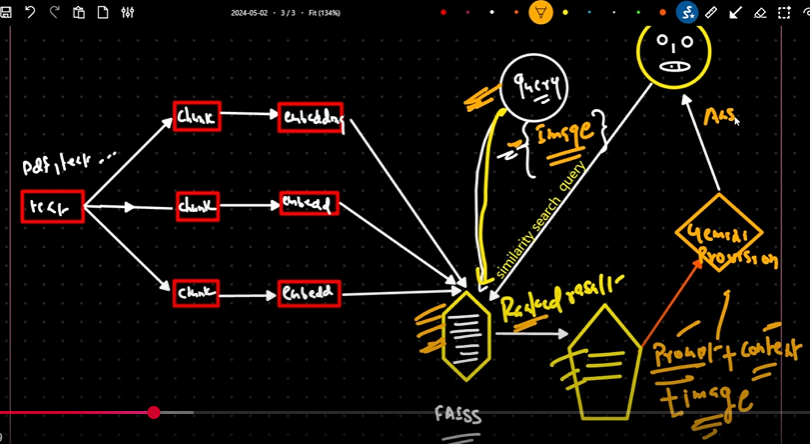

In [1]:

import os
import requests
from PIL import Image

In [2]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import display, Markdown

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI

d:\a27_YEARS_OLD\multimodal_rag\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
from langchain_core.messages import HumanMessage, SystemMessage

In [5]:
from langchain.vectorstores import DocArrayInMemorySearch

In [6]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings

In [7]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate

In [8]:
from langchain.schema.document import Document
from langchain_community.document_loaders import TextLoader

In [9]:
from langchain_text_splitters import CharacterTextSplitter

In [10]:
from langchain_community.vectorstores import FAISS

In [11]:
import os
from dotenv import load_dotenv

load_dotenv()

True

In [12]:
GOOGLE_API_KEY=os.getenv('GEMINI_API_KEY')
os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY

In [71]:
def load_model(model_name):
  if model_name=="gemini-pro":
    llm = ChatGoogleGenerativeAI(model="gemini-pro")
  else:
    llm=ChatGoogleGenerativeAI(model="gemini-1.5-flash")

  return llm

In [14]:
model_text=load_model("gemini-pro")

In [15]:
model_text.invoke("please come up with the best funny line.").content

'"I\'m like a Rubik\'s Cube. The more you play with me, the more frustrated you get."'

In [ ]:
model_text(
    [
        HumanMessage(content="Answer with Simple 'Yes' or 'No'. Question: Is apple a Fruit?")
    ]
).content


C:\Users\lenovo\AppData\Local\Temp\ipykernel_10096\1591641452.py:1: LangChainDeprecationWarning: The method `BaseChatModel.__call__` was deprecated in langchain-core 0.1.7 and will be removed in 1.0. Use :meth:`~invoke` instead.
  model_text(


'Yes'

In [51]:
# import io
# import base64

In [47]:
# def get_image(url,filename,extension):
#   global bytes_content
#   bytes_content = requests.get(url).content
#   with open(f'content/{filename}.{extension}', 'wb') as f:
#     f.write(bytes_content)
#   image = Image.open(f"content/{filename}.{extension}")
#   image.show()
#   return image

In [52]:
# img_buffer = io.BytesIO(bytes_content)

In [53]:
# img_base64 = base64.b64encode(img_buffer.getvalue()).decode("utf-8")

In [42]:
# with open(f'content/mango.jpg', 'rb') as f:
#     img = Image.open(f)

In [45]:
# print(img)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1810x2715 at 0x29006283850>


In [ ]:
# Import the requests library: Make sure you have imported the requests library at the beginning of your code.
# Send a GET request: The requests.get() function sends a GET request to the specified URL.
# Retrieve the content: The .content attribute of the response object contains the content of the response in bytes.

In [48]:
# image = get_image("https://hugaplant.com/cdn/shop/products/MAIN_81788813-2624-49b8-b1ca-307fc71de95a.png?v=1674722192&width=720",
#                   "mango-tree",
#                   "png")

In [63]:
image_url = "https://hugaplant.com/cdn/shop/products/MAIN_81788813-2624-49b8-b1ca-307fc71de95a.png?v=1674722192&width=720"

In [46]:
# print(bytes_content)

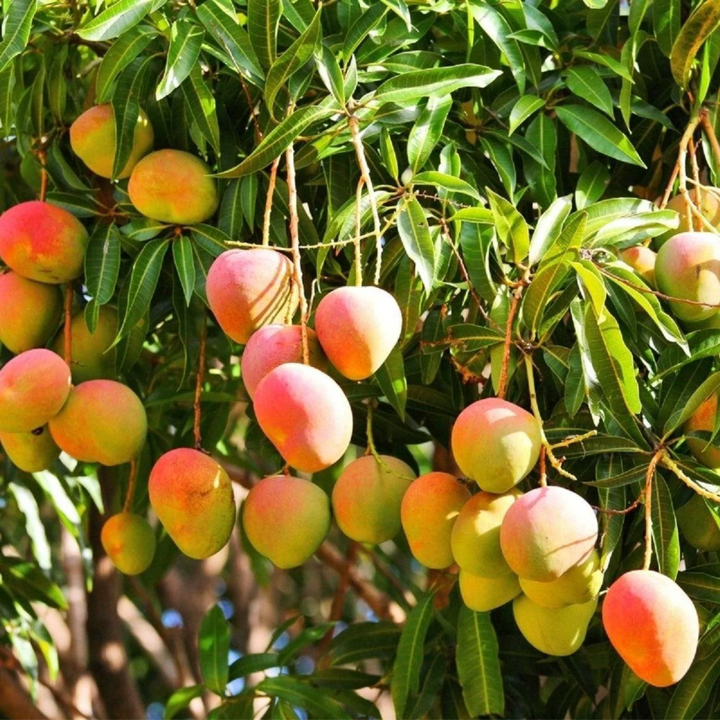

In [28]:
image

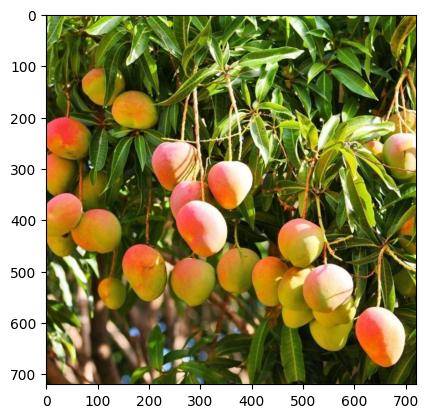

In [29]:
plt.imshow(image)
plt.show()

In [72]:
flash_model=load_model("gemini-1.5-flash")

In [92]:
flash_model

ChatGoogleGenerativeAI(model='models/gemini-1.5-flash', google_api_key=SecretStr('**********'), client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x000002900BAADBD0>, default_metadata=())

In [67]:

prompt="give me summary of this image in 5 words"

In [68]:

message= HumanMessage(
    content=[
        {
            "type": "text",
            "text": prompt,
        },
        {

            "type": "image_url", 
            "image_url": image_url
        }
    ]
)

In [93]:
message

HumanMessage(content=[{'type': 'text', 'text': 'give me summary of this image in 5 words'}, {'type': 'image_url', 'image_url': 'https://hugaplant.com/cdn/shop/products/MAIN_81788813-2624-49b8-b1ca-307fc71de95a.png?v=1674722192&width=720'}], additional_kwargs={}, response_metadata={})

In [ ]:
# Text Content: The first element in the content list is a text object with the prompt.
# Image Content: The second element is an image object with the image URL.

In [73]:
print(flash_model.invoke([message]).content)

Mangoes ripening on tree branches.


In [74]:
loader = TextLoader("content/mango-tree.txt")
print(loader.load()[0].page_content)

As the warm sunlight filters through the lush green leaves of the mango tree, a juicy mango hangs gently 
from its branch, soaking up the radiant heat. The gentle morning breeze stirs the leaves, causing the mango to 
sway ever so slightly, as if dancing to the rhythm of nature. With each passing day, the mango's skin 
transforms from a deep green to a vibrant yellow, signaling its gradual ripening. The sweet, heady aroma of 
ripe mango begins to waft through the air, enticing all who pass beneath the tree to partake in its succulent 
delight.


In [94]:
loader

In [75]:
text=loader.load()[0].page_content

In [95]:
text

"As the warm sunlight filters through the lush green leaves of the mango tree, a juicy mango hangs gently \nfrom its branch, soaking up the radiant heat. The gentle morning breeze stirs the leaves, causing the mango to \nsway ever so slightly, as if dancing to the rhythm of nature. With each passing day, the mango's skin \ntransforms from a deep green to a vibrant yellow, signaling its gradual ripening. The sweet, heady aroma of \nripe mango begins to waft through the air, enticing all who pass beneath the tree to partake in its succulent \ndelight."

In [76]:

def get_text_chunks_langchain(text):
  text_splitter = CharacterTextSplitter(chunk_size=20, chunk_overlap=10)
  docs = [Document(page_content=x) for x in text_splitter.split_text(text)]
  return docs

In [77]:
docs = get_text_chunks_langchain(text)

In [78]:
docs

[Document(metadata={}, page_content="As the warm sunlight filters through the lush green leaves of the mango tree, a juicy mango hangs gently \nfrom its branch, soaking up the radiant heat. The gentle morning breeze stirs the leaves, causing the mango to \nsway ever so slightly, as if dancing to the rhythm of nature. With each passing day, the mango's skin \ntransforms from a deep green to a vibrant yellow, signaling its gradual ripening. The sweet, heady aroma of \nripe mango begins to waft through the air, enticing all who pass beneath the tree to partake in its succulent \ndelight.")]

In [79]:
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")

In [96]:
embeddings

GoogleGenerativeAIEmbeddings(client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x000002900B90BA10>, model='models/embedding-001', task_type=None, google_api_key=SecretStr('**********'), credentials=None, client_options=None, transport=None, request_options=None)

In [80]:
vectorstore = FAISS.from_documents(docs,embedding=embeddings) # inmemory vectors store

In [97]:
vectorstore

In [81]:

retriever=vectorstore.as_retriever()

In [98]:
retriever

VectorStoreRetriever(tags=['FAISS', 'GoogleGenerativeAIEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x000002900BA62110>, search_kwargs={})

In [82]:
retriever.invoke("mango")

[Document(id='83b88934-7d2f-49ab-a467-5fee69caab79', metadata={}, page_content="As the warm sunlight filters through the lush green leaves of the mango tree, a juicy mango hangs gently \nfrom its branch, soaking up the radiant heat. The gentle morning breeze stirs the leaves, causing the mango to \nsway ever so slightly, as if dancing to the rhythm of nature. With each passing day, the mango's skin \ntransforms from a deep green to a vibrant yellow, signaling its gradual ripening. The sweet, heady aroma of \nripe mango begins to waft through the air, enticing all who pass beneath the tree to partake in its succulent \ndelight.")]

In [83]:

from langchain_core.runnables import RunnableLambda, RunnablePassthrough  # runtime queries

In [84]:

llm_vision = load_model("gemini-1.5-flash")

In [85]:

llm_text = load_model("gemini-pro")

In [110]:

template = """
```
{context}
```

{query}


Provide brief information.
"""
     

In [111]:
prompt = ChatPromptTemplate.from_template(template)

In [112]:
prompt

ChatPromptTemplate(input_variables=['context', 'query'], input_types={}, partial_variables={}, messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'query'], input_types={}, partial_variables={}, template='\n```\n{context}\n```\n\n{query}\n\n\nProvide brief information.\n'), additional_kwargs={})])

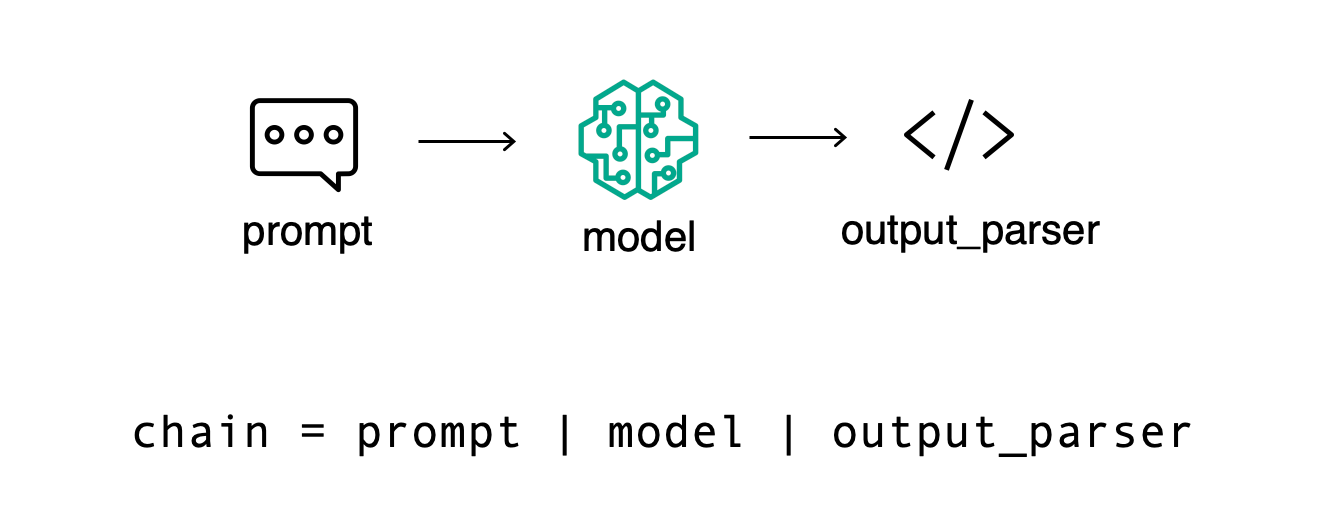

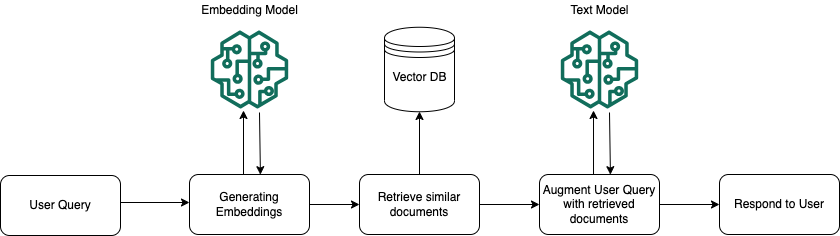

In [113]:
rag_chain = (
    {"context": retriever, "query": RunnablePassthrough()}
    | prompt
    | llm_text
    | StrOutputParser()
)

In [114]:
rag_chain

{
  context: VectorStoreRetriever(tags=['FAISS', 'GoogleGenerativeAIEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x000002900BA62110>, search_kwargs={}),
  query: RunnablePassthrough()
}
| ChatPromptTemplate(input_variables=['context', 'query'], input_types={}, partial_variables={}, messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'query'], input_types={}, partial_variables={}, template='\n```\n{context}\n```\n\n{query}\n\n\nProvide brief information.\n'), additional_kwargs={})])
| ChatGoogleGenerativeAI(model='models/gemini-pro', google_api_key=SecretStr('**********'), client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x000002900BC06C50>, default_metadata=())
| StrOutputParser()

In [115]:
result = rag_chain.invoke("can you give me a detail of ripening mango ?")

In [116]:
result

'**Mango Ripening Process:**\n\n* **Initial Stage:** Mangoes start as deep green and hard.\n* **Color Change:** As they ripen, the skin gradually turns from green to yellow.\n* **Aroma:** The ripe mangoes release a sweet, heady aroma.\n* **Texture:** The flesh softens and becomes juicy.\n* **Taste:** The mangoes develop a sweet, succulent flavor.'

In [117]:
display(Markdown(result))

**Mango Ripening Process:**

* **Initial Stage:** Mangoes start as deep green and hard.
* **Color Change:** As they ripen, the skin gradually turns from green to yellow.
* **Aroma:** The ripe mangoes release a sweet, heady aroma.
* **Texture:** The flesh softens and becomes juicy.
* **Taste:** The mangoes develop a sweet, succulent flavor.

In [118]:
full_chain = (
    RunnablePassthrough() | llm_vision | StrOutputParser() | rag_chain
)

In [119]:
full_chain

RunnablePassthrough()
| ChatGoogleGenerativeAI(model='models/gemini-1.5-flash', google_api_key=SecretStr('**********'), client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x000002900BADC990>, default_metadata=())
| StrOutputParser()
| {
    context: VectorStoreRetriever(tags=['FAISS', 'GoogleGenerativeAIEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x000002900BA62110>, search_kwargs={}),
    query: RunnablePassthrough()
  }
| ChatPromptTemplate(input_variables=['context', 'query'], input_types={}, partial_variables={}, messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'query'], input_types={}, partial_variables={}, template='\n```\n{context}\n```\n\n{query}\n\n\nProvide brief information.\n'), additional_kwargs={})])
| ChatGoogleGenerativeAI(model='models/gemini-pro', google_api_key=SecretStr('**********'), client=<google.ai.generativelanguage_v1beta.se

In [120]:

message = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "Provide information about how can i store ripe mango ?",
        },  # You can optionally provide text parts
        {"type": "image_url", "image_url": image_url},
    ]
)

In [121]:
result = full_chain.invoke([message])

In [122]:
result

"**Storing Ripe Mangoes:**\n\n**Short-Term (Within a Few Days):**\n* Keep at room temperature on the counter, avoiding direct sunlight or heat.\n\n**Longer-Term:**\n* Refrigerate to slow down ripening, but note that flavor and texture may be affected.\n\n**Tips:**\n* Don't wash before storing.\n* Handle with care to prevent bruising.\n* Separate from ethylene-producing fruits.\n* Freeze ripe mangoes for extended storage.\n\n**Signs of Spoilage:**\n* Soft spots or bruises\n* Visible mold\n* Unpleasant odor"

In [123]:
display(Markdown(result))

**Storing Ripe Mangoes:**

**Short-Term (Within a Few Days):**
* Keep at room temperature on the counter, avoiding direct sunlight or heat.

**Longer-Term:**
* Refrigerate to slow down ripening, but note that flavor and texture may be affected.

**Tips:**
* Don't wash before storing.
* Handle with care to prevent bruising.
* Separate from ethylene-producing fruits.
* Freeze ripe mangoes for extended storage.

**Signs of Spoilage:**
* Soft spots or bruises
* Visible mold
* Unpleasant odor